Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [2]:
with open('Social_Network_Ads.csv') as r:
    my_csv=pd.read_csv(r)
x=my_csv.iloc[:,:-1].values
y=my_csv.iloc[:,-1].values

Splitting data into training and test set

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

Building the model (K-NN)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

Comparing prediction and real result

In [6]:
y_pred=classifier.predict(sc.transform(x_test))
print(np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


Confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
cs=confusion_matrix(y_test,y_pred)
print(cs)

[[54 10]
 [ 4 32]]


Evaluating score of model

In [8]:
classifier.score(sc.transform(x_test),y_test)

0.86

Predicting new data

In [9]:
classifier.predict(sc.transform([[30,44000]]))

array([0], dtype=int64)

In [10]:
x_train

array([[-0.04531597,  0.2793039 ],
       [-1.12895866,  0.2793039 ],
       [-0.73490677,  1.84629278],
       [-1.32598461, -0.34749166],
       [ 1.1368397 , -1.20221287],
       [-0.83341974, -1.20221287],
       [-0.93193272,  0.53572026],
       [ 1.72791753,  1.70383925],
       [ 1.1368397 ,  0.10835966],
       [-0.14382894, -0.46145448],
       [ 0.25022295,  0.13685036],
       [ 0.25022295, -0.26201954],
       [ 0.84130078, -1.08825004],
       [-0.04531597,  0.22232248],
       [-0.73490677,  0.2793039 ],
       [ 0.93981375, -0.57541731],
       [-0.04531597,  0.25081319],
       [ 1.62940456, -0.00560317],
       [ 1.03832673,  1.81780207],
       [-1.32598461,  0.39326673],
       [ 1.43237862,  2.27365339],
       [-1.12895866,  0.39326673],
       [ 0.93981375, -1.43013852],
       [-0.24234191, -0.9173058 ],
       [-0.04531597, -0.37598236],
       [ 0.84130078,  1.33346006],
       [ 0.44724889,  0.2793039 ],
       [ 0.15170998,  1.81780207],
       [ 1.62940456,

Visualising the Training set result

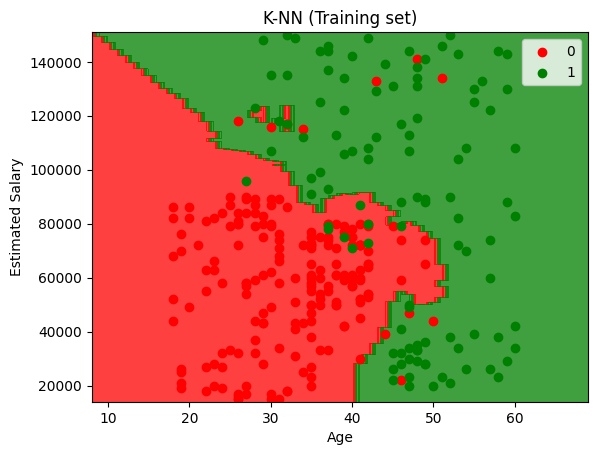

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set result

In [13]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(x_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('K-NN (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()